1. Derive the descriptive statistics of the data and discuss the points that you think remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these two variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and informations around those dates.
3. In your chosen state, which one of the lessons the students are more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice that there are too many missing values for math and reading scores. Fill out the missing values using mean, median and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [52]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

education_df = pd.read_sql_query('select * from useducation',con=engine)

education_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [0]:
#We fill in the missing values using interpolation since our data is a time series data:
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE",
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE",
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G",
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G",
             "GRADES_9_12_G", "GRADES_ALL_G"]

states = education_df["STATE"].unique()

for state in states:
    education_df.loc[education_df["STATE"] == state, fill_list] = education_df.loc[education_df["STATE"] == state, fill_list].interpolate()

# we drop the null values after interpolation
education_df.dropna(inplace=True)

In [42]:
#1. Derive the descriptive statistics of the data and discuss the points that you think remarkable.
education_df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,CAPITAL_OUTLAY_EXPENDITURE,GRADES_PK_G,GRADES_KG_G,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.00000,466.00000,466.000000,4.660000e+02,4.660000e+02,4.660000e+02,466.000000,466.000000,466.000000,466.000000
mean,2008.577253,9.442125e+05,1.078853e+07,9.568659e+05,4.999548e+06,4.832112e+06,1.086947e+07,5.638251e+06,3.181222e+06,4.913261e+05,1.038843e+06,22874.634120,72083.415236,72515.82618,72917.07618,64773.880901,5.836186e+05,2.867026e+05,8.933042e+05,236.909728,279.802668,219.508638,263.789943
std,5.779779,1.122051e+06,1.356335e+07,1.330702e+06,6.405481e+06,6.325995e+06,1.373667e+07,7.255903e+06,3.840941e+06,6.009649e+05,1.482245e+06,34605.068547,87006.137056,86463.95300,85835.16237,77557.604833,6.925615e+05,3.408161e+05,1.060080e+06,8.695903,9.381511,7.426546,6.875627
min,1996.000000,4.417900e+04,6.788740e+05,5.787000e+04,0.000000e+00,2.853100e+04,7.032450e+05,3.182600e+05,2.041170e+05,2.310700e+04,1.545200e+04,91.000000,4528.000000,3423.00000,2860.00000,2188.000000,2.676200e+04,9.970000e+03,3.682300e+04,187.134670,232.831510,181.626990,236.379102
25%,2005.000000,2.794832e+05,2.712660e+06,2.614470e+05,1.491747e+06,9.513430e+05,2.670300e+06,1.416288e+06,8.472295e+05,1.296515e+05,2.443388e+05,3753.000000,20988.000000,20489.75000,20880.25000,18527.750000,1.666395e+05,8.194400e+04,2.596278e+05,232.760641,274.707118,215.338956,259.661771
50%,2009.000000,6.639415e+05,6.106834e+06,5.544340e+05,3.021544e+06,2.442983e+06,6.249671e+06,3.186679e+06,1.899310e+06,3.271845e+05,6.059525e+05,13068.500000,51156.500000,50918.00000,50114.50000,41543.000000,4.067475e+05,1.868900e+05,6.264775e+05,238.394124,281.531587,221.130461,265.217081
75%,2013.000000,1.018588e+06,1.222407e+07,1.033414e+06,6.240349e+06,5.488079e+06,1.195951e+07,6.154768e+06,3.667420e+06,5.609385e+05,1.046753e+06,28808.500000,79618.000000,79929.50000,80949.75000,75641.250000,6.424952e+05,3.234915e+05,9.758625e+05,242.602566,286.197041,224.531280,268.307884
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,1.022366e+07,249524.000000,530531.000000,493415.00000,500143.00000,498403.000000,3.929869e+06,2.011865e+06,5.926631e+06,253.420961,300.568235,236.773867,280.499130


1.Average TOTAL_REVENUE is less than TOTAL_EXPENDITURE. This means that states run budget deficit on education on average.

2.INSTRUCTION_EXPENDITURE makes up almost half of the total expenditures on education.

3.Average math scores are higher than average reading scores but the standard deviation of the average math scores is also higher than the that of the average reading scores.

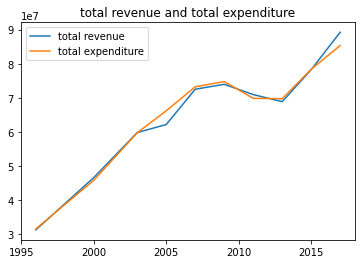

In [43]:
 #2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these two variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and informations around those dates.
plt.plot(education_df.loc[education_df.STATE == 'CALIFORNIA', 'YEAR'], education_df.loc[education_df.STATE == 'CALIFORNIA', 'TOTAL_REVENUE'], label = 'total revenue')

plt.plot(education_df.loc[education_df.STATE == 'CALIFORNIA', 'YEAR'], education_df.loc[education_df.STATE == 'CALIFORNIA', 'TOTAL_EXPENDITURE'], label = 'total expenditure')

plt.title('total revenue and total expenditure')
plt.legend()

<BarContainer object of 10 artists>

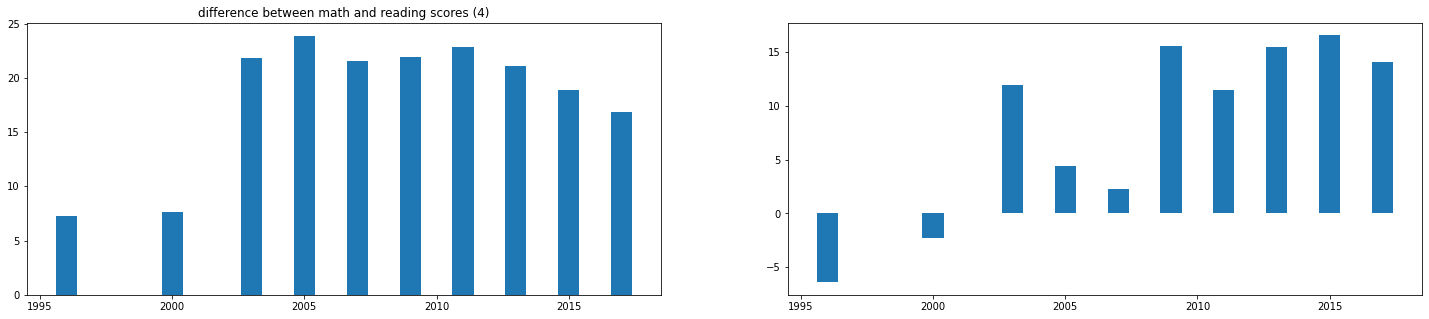

In [45]:
# 3. In your chosen state, which one of the lessons the students are more successful, math or reading?
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
plt.bar(education_df.loc[education_df.STATE == 'CALIFORNIA', 'YEAR'],
         education_df.loc[education_df.STATE == 'CALIFORNIA', 'AVG_MATH_4_SCORE'] - education_df.loc[education_df.STATE == 'CALIFORNIA', 'AVG_READING_4_SCORE'])

plt.title("difference between math and reading scores (4)")

plt.subplot(1,2,2)
plt.bar(education_df.loc[education_df.STATE == 'CALIFORNIA', 'YEAR'],
         education_df.loc[education_df.STATE == 'CALIFORNIA', 'AVG_MATH_8_SCORE'] - education_df.loc[education_df.STATE == 'CALIFORNIA', 'AVG_READING_8_SCORE'])


In [47]:
print("difference between math and reading scores (4)")
print(education_df.loc[education_df.STATE == 'CALIFORNIA', 'AVG_MATH_4_SCORE'] - education_df.loc[education_df.STATE == 'CALIFORNIA', 'AVG_READING_4_SCORE'],'\n')
print("difference between math and reading scores (8)")
print(education_df.loc[education_df.STATE == 'CALIFORNIA', 'AVG_MATH_8_SCORE'] - education_df.loc[education_df.STATE == 'CALIFORNIA', 'AVG_READING_8_SCORE'])


difference between math and reading scores (4)
213      7.216492
420      7.648537
576     21.822545
680     23.854931
784     21.511905
891     21.912522
997     22.806357
1101    21.108497
1203    18.871396
1451    16.841127
dtype: float64 

difference between math and reading scores (8)
213     -6.424972
420     -2.323040
576     11.976121
680      4.373619
784      2.222356
891     15.553342
997     11.484551
1101    15.453063
1203    16.556305
1451    14.117570
dtype: float64



In California, students are more successful at math than reading.

Text(0.5, 1.0, 'AVG_READING_8_SCORE')

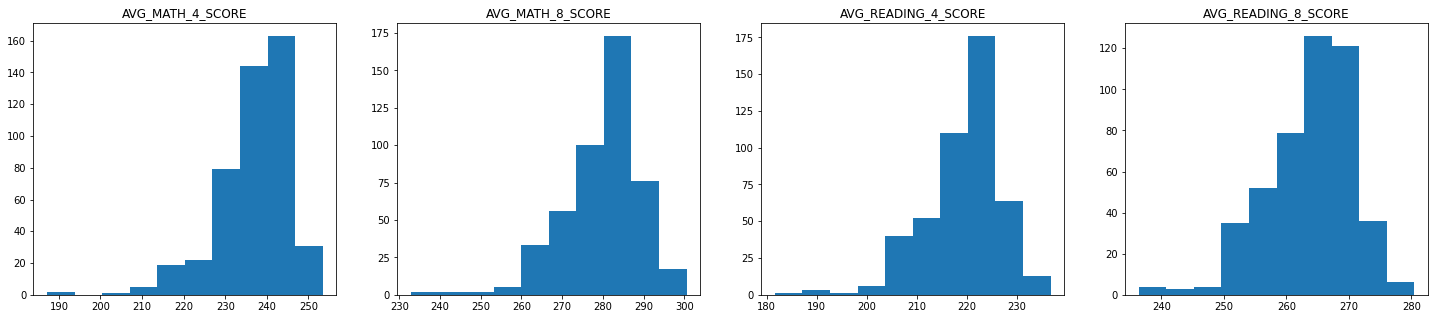

In [50]:
#4. What are the distributions of the math and reading scores in the sample?
plt.figure(figsize=(25,5))
plt.subplot(1,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title('AVG_MATH_4_SCORE')

plt.subplot(1,4,2)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title('AVG_MATH_8_SCORE')

plt.subplot(1,4,3)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title('AVG_READING_4_SCORE')

plt.subplot(1,4,4)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title('AVG_READING_8_SCORE')

The distributions are not normal distribution but slightly skewed to the left both for reading and writing. This means that average of the scores are lower than the median.

In [0]:
#5. Notice that there are too many missing values for math and reading scores. Fill out the missing values using mean, median and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables.

#Since, in the begginning of this solution notebook we filled in the missing values and then dropped the rows that have missing values, we need to load our dataset once again to answer this question:

education_df = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()



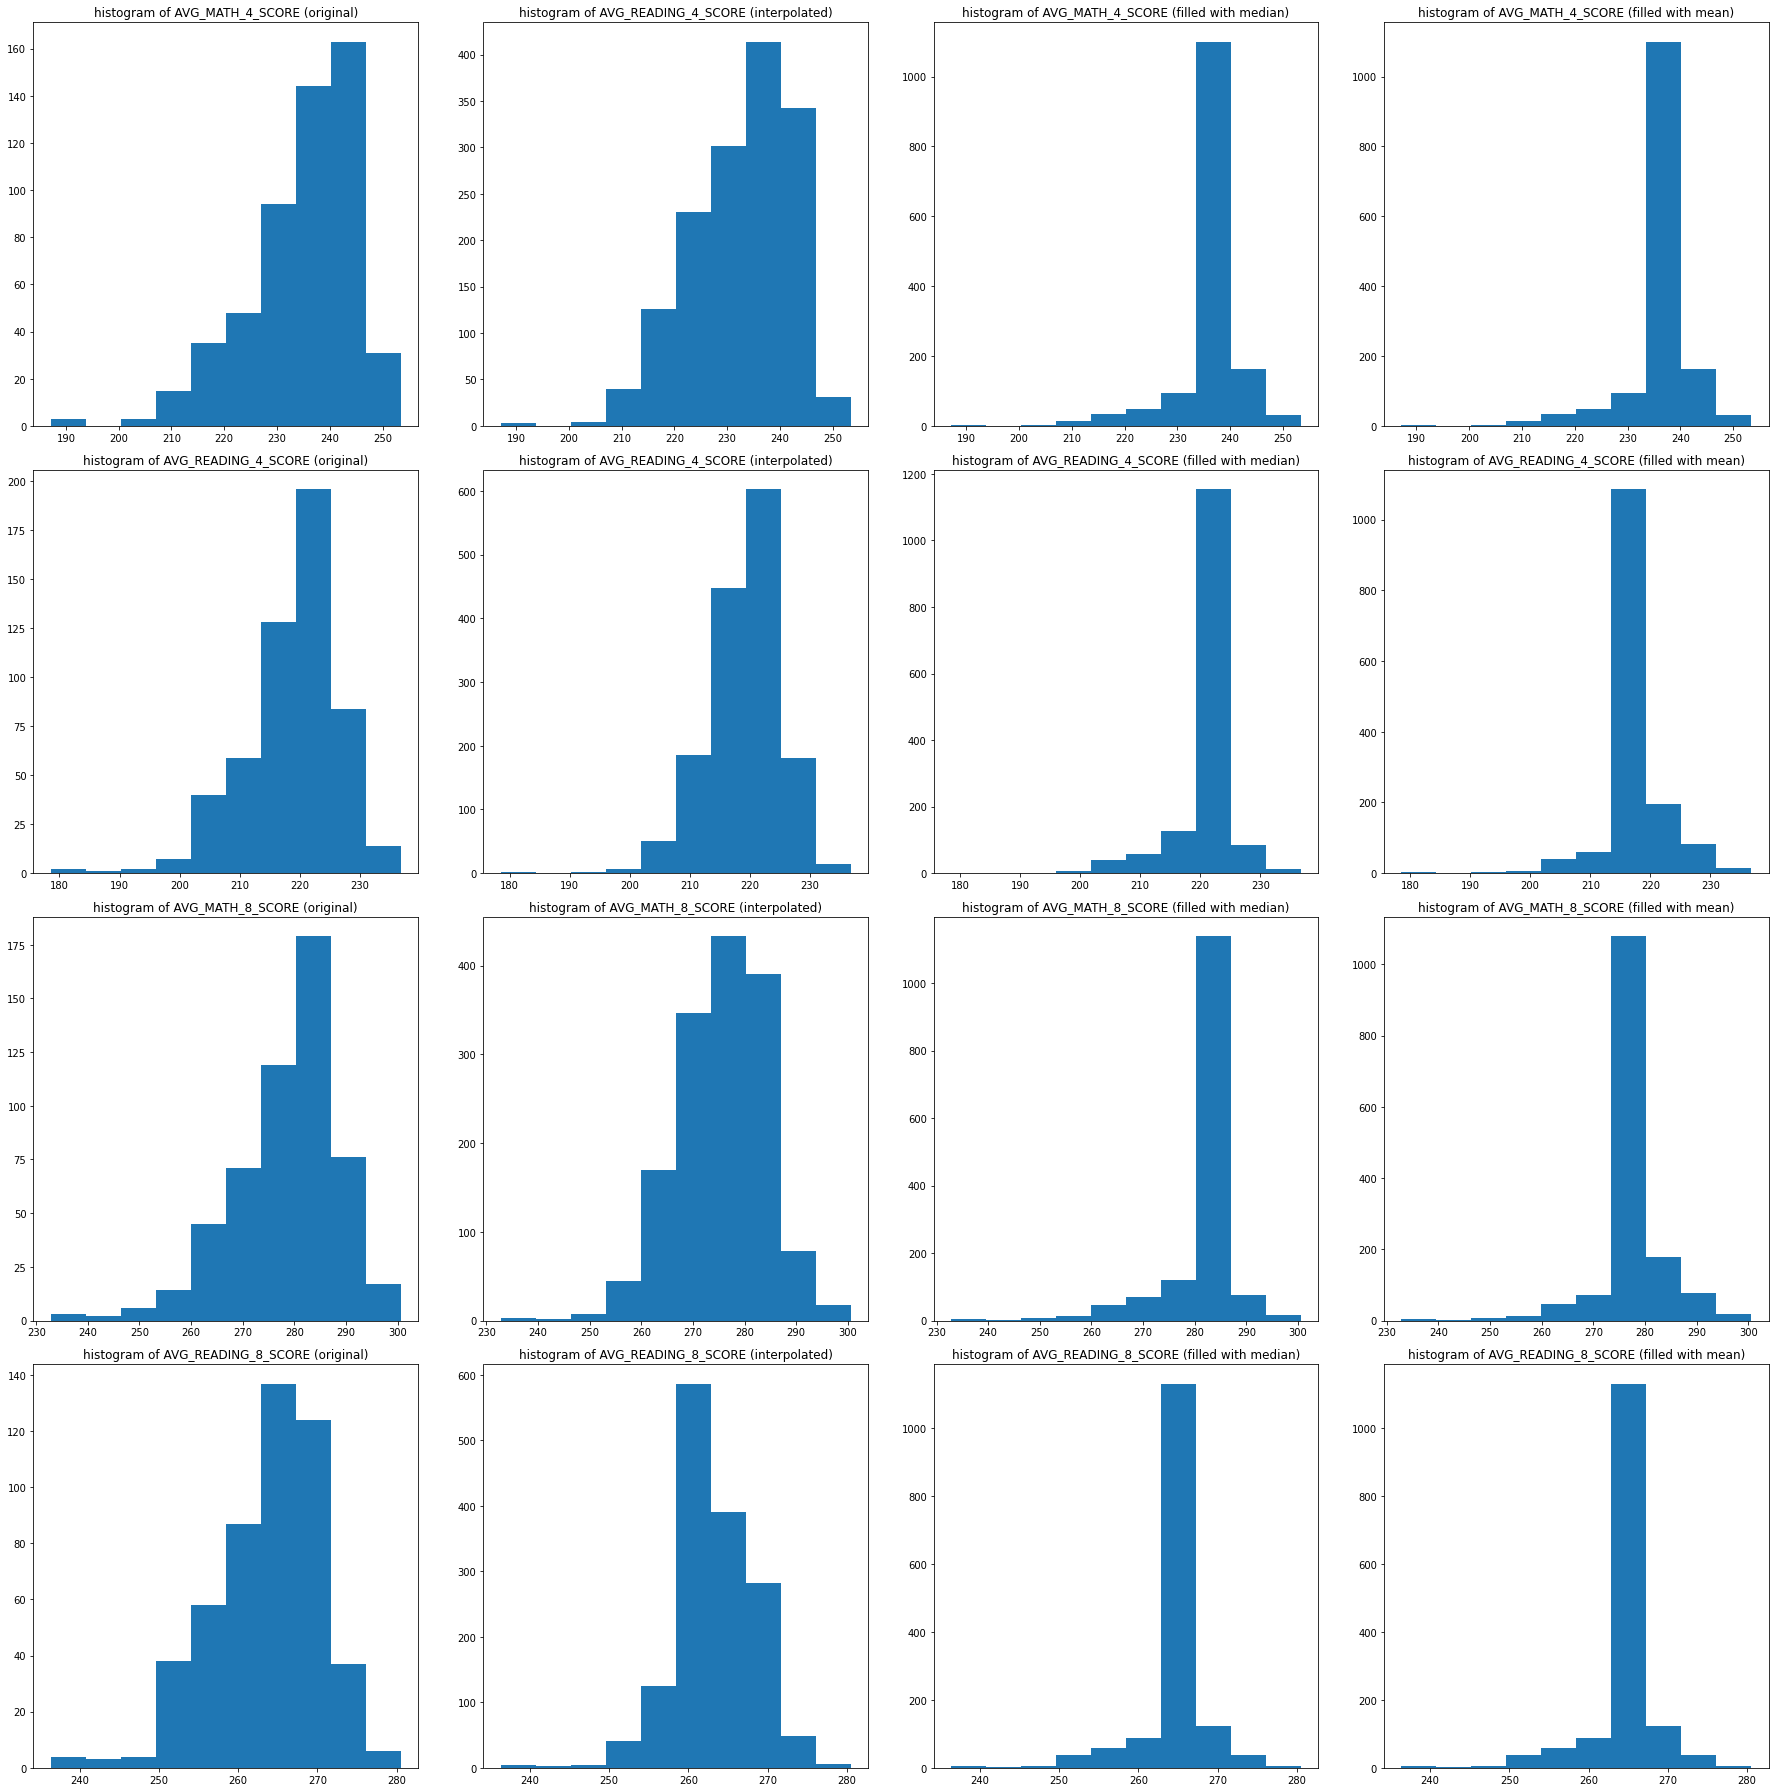

In [58]:
plt.figure(figsize=(25,25))

plt.subplot(4,4,1)
plt.hist(education_df.AVG_MATH_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,2)
plt.hist(education_df.AVG_MATH_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,3)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_4_SCORE"))

plt.subplot(4,4,4)
plt.hist(education_df.AVG_MATH_4_SCORE.fillna(education_df.AVG_MATH_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_4_SCORE"))


plt.subplot(4,4,5)
plt.hist(education_df.AVG_READING_4_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,6)
plt.hist(education_df.AVG_READING_4_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,7)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_4_SCORE"))

plt.subplot(4,4,8)
plt.hist(education_df.AVG_READING_4_SCORE.fillna(education_df.AVG_READING_4_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_4_SCORE"))


plt.subplot(4,4,9)
plt.hist(education_df.AVG_MATH_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,10)
plt.hist(education_df.AVG_MATH_8_SCORE.interpolate())
plt.title("histogram of {} (interpolated)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,11)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_MATH_8_SCORE"))

plt.subplot(4,4,12)
plt.hist(education_df.AVG_MATH_8_SCORE.fillna(education_df.AVG_MATH_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_MATH_8_SCORE"))


plt.subplot(4,4,13)
plt.hist(education_df.AVG_READING_8_SCORE.dropna())
plt.title("histogram of {} (original)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,14)
plt.hist(education_df.AVG_READING_8_SCORE.interpolate().dropna())
plt.title("histogram of {} (interpolated)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,15)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.median()))
plt.title("histogram of {} (filled with median)".format("AVG_READING_8_SCORE"))

plt.subplot(4,4,16)
plt.hist(education_df.AVG_READING_8_SCORE.fillna(education_df.AVG_READING_8_SCORE.mean()))
plt.title("histogram of {} (filled with mean)".format("AVG_READING_8_SCORE"))

plt.tight_layout()



The technique for filling in the missing values substantially affects the distributions of the variables. Especially in our case, filling with mean or median has the strongest effect. This is probably due to the fact that we have a lot of missing values in our data.

The change in the distribution might have some serious effects on our model results. Hence, instead of filling in the missing values with mean or median, we may fill them in using interpolation or we may just discard the missing values.